<a href="https://colab.research.google.com/github/Fileboss/BAUS_INHA_Database_LAB_WEEK11/blob/main/BAUS_INHA_Database_Lab_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BAUS INHA DATABASE LAB WEEK 11

In [1]:
import sqlite3 as sl

In [2]:
con = sl.connect('my-test.db')

In [3]:
with con:
  con.execute("""
    CREATE TABLE USER (
      id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
      name TEXT,
      age INTEGER
    );
  """)

In [4]:
sql = 'INSERT INTO USER (id, name, age) values(?,?,?)'
data = [
    (1,'Alice',21),
    (2,'Bob',22),
    (3,'Chris',23),
]

In [5]:
with con:
  con.executemany(sql, data)

In [6]:
with con:
  data = con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [7]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id':[1,2,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,2,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [8]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
  SELECT s.user_id, u.name, u.age, s.skill
  FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Network Security
1,2,Bob,22,Algorithm Development
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [9]:
df.to_sql('USER_SKILL', con)

In [10]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline


In [11]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [12]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [13]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [14]:
%%sql sqlite:///
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [15]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [16]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows-i))
  temperature = uniform (18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [17]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:12:18,21.208840491372094
2021-06-28 09:12:18,21.562689721185926
2021-06-29 09:12:18,25.632335791928888
2021-06-30 09:12:18,23.161071498078613
2021-07-01 09:12:18,21.04455251572955


In [18]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:12:18.547218,21.208840491372094
2021-06-28 09:12:18.547218,21.562689721185926
2021-06-29 09:12:18.547218,25.632335791928888
2021-06-30 09:12:18.547218,23.161071498078613
2021-07-01 09:12:18.547218,21.04455251572955
2021-07-02 09:12:18.547218,24.33566968501886
2021-07-03 09:12:18.547218,18.171205301222194
2021-07-04 09:12:18.547218,18.99611862720543
2021-07-05 09:12:18.547218,25.949377940419705
2021-07-06 09:12:18.547218,22.263117153357328


In [19]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', DATE) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:12:18.547218,21.208840491372094
2021-06-28 09:12:18.547218,21.562689721185926
2021-06-29 09:12:18.547218,25.632335791928888
2021-06-30 09:12:18.547218,23.161071498078613
2021-07-01 09:12:18.547218,21.04455251572955
2021-07-02 09:12:18.547218,24.33566968501886
2021-07-03 09:12:18.547218,18.171205301222194
2021-07-04 09:12:18.547218,18.99611862720543
2021-07-05 09:12:18.547218,25.949377940419705
2021-07-06 09:12:18.547218,22.263117153357328


In [20]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
        AVG(Temperature) AS MEAN_TMP,
        MAX(Temperature) AS MAX_TMP,
        MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.871906146804964,25.989876107569486,18.053144177376318
2022,21.970291213269938,25.991307241713624,18.006798846985877


In [21]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:12:18', '2021-06-28 09:12:18',
               '2021-06-29 09:12:18', '2021-06-30 09:12:18',
               '2021-07-01 09:12:18', '2021-07-02 09:12:18',
               '2021-07-03 09:12:18', '2021-07-04 09:12:18',
               '2021-07-05 09:12:18', '2021-07-06 09:12:18',
               ...
               '2022-10-30 09:12:18', '2022-10-31 09:12:18',
               '2022-11-01 09:12:18', '2022-11-02 09:12:18',
               '2022-11-03 09:12:18', '2022-11-04 09:12:18',
               '2022-11-05 09:12:18', '2022-11-06 09:12:18',
               '2022-11-07 09:12:18', '2022-11-08 09:12:18'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

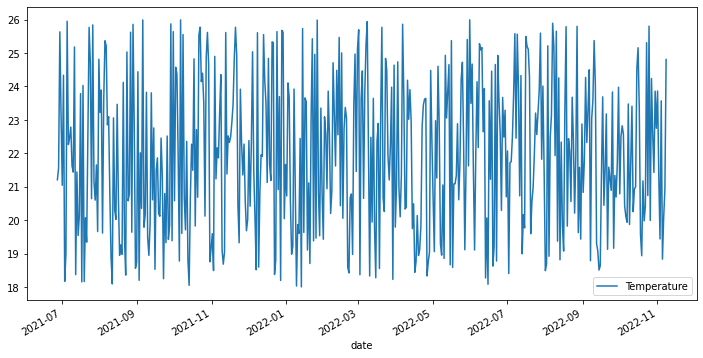

In [22]:
df.plot(figsize=(12,6))